In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd "/content/gdrive/MyDrive/deep_learning_project/"
!pip install import-ipynb

/content/gdrive/MyDrive/deep_learning_project
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=653611dab8d4769684ba6d720b7ba10f804144b77c89a123db7e46957610c356
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
import import_ipynb
from utils import *
import numpy as np
from tensorflow.keras import models
from sklearn.metrics import precision_score,recall_score 

PATH_MODEL_1 = "/content/gdrive/MyDrive/deep_learning_project/models/2.2/Scratch_CNN.h5"
PATH_MODEL_2 = "/content/gdrive/MyDrive/deep_learning_project/models/3.2/InceptionV3.h5"
PATH_MODEL_3 = "/content/gdrive/MyDrive/deep_learning_project/models/3.2/VGG16.h5"

def prediction_traduction(prediction):
  if(prediction>0.5):
    return 1
  else:
    return 0

def load_models():
  model_1 = models.load_model(PATH_MODEL_1)
  model_2 = models.load_model(PATH_MODEL_2)
  model_3 = models.load_model(PATH_MODEL_3)
  return model_1,model_2,model_3

def average_voting(prediction_1,prediction_2,prediction_3):
  return prediction_traduction(0.33 * (prediction_1 + prediction_2 + prediction_3))
  

def majority_voting(prediction_1,prediction_2,prediction_3):
  voting = np.zeros(2)
  voting[prediction_traduction(prediction_1)] += 1 
  voting[prediction_traduction(prediction_2)] += 1 
  voting[prediction_traduction(prediction_3)] += 1 
  if(voting[0]>voting[1]):
    return 0
  else:
    return 1

def general_performance():
  testing_images, testing_labels= load_testing()
  testing_labels = label_traduction(testing_labels,0)

  first_testing_images = enhance_image(testing_images)
  first_testing_images = filter_dataset(first_testing_images)

  second_testing_images = enhance_contrast(testing_images)

  first_testing_images = np.expand_dims(first_testing_images, -1)
  second_testing_images = np.expand_dims(second_testing_images, -1)

  first_testing_images = first_testing_images/65536
  second_testing_images = second_testing_images/65536

  model_1,model_2,model_3 = load_models()

  average_prediction = []
  majority_prediction = []

  prediction_1 = model_1.predict(first_testing_images)
  prediction_2 = model_2.predict(second_testing_images)
  prediction_3 = model_3.predict(second_testing_images)

  for i in range(len(prediction_1)):
    average_prediction.append(average_voting(prediction_1[i],prediction_2[i],prediction_3[i]))
    majority_prediction.append(majority_voting(prediction_1[i],prediction_2[i],prediction_3[i]))

  print("---------------------------------------------------------")
  print("Average voting performances")
  print("Test loss", precision_score(testing_labels,average_prediction))
  print("Test accuracy",recall_score(testing_labels,average_prediction))
  in_depth_performance(testing_labels,average_prediction)

  print("---------------------------------------------------------")
  print("Majority voting performances")
  print("Test loss", precision_score(testing_labels,majority_prediction))
  print("Test accuracy",recall_score(testing_labels,majority_prediction))
  in_depth_performance(testing_labels,majority_prediction)

importing Jupyter notebook from utils.ipynb


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


---------------------------------------------------------
Average voting performances
Test loss 0.7689243027888446
Test accuracy 0.8812785388127854


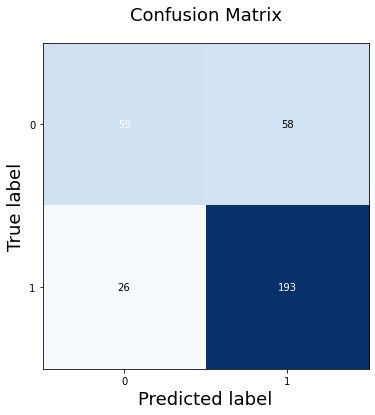

precision score:  0.7689243027888446
recall score:  0.8812785388127854
f2:  0.8562555456965395
f0.5:  0.7890433360588717
classification report: 
               precision    recall  f1-score   support

           0       0.69      0.50      0.58       117
           1       0.77      0.88      0.82       219

    accuracy                           0.75       336
   macro avg       0.73      0.69      0.70       336
weighted avg       0.74      0.75      0.74       336

AUC:  0.6927760215431449


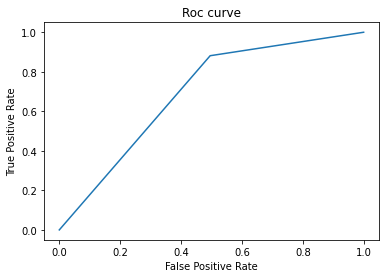

---------------------------------------------------------
Majority voting performances
Test loss 0.7710843373493976
Test accuracy 0.8767123287671232


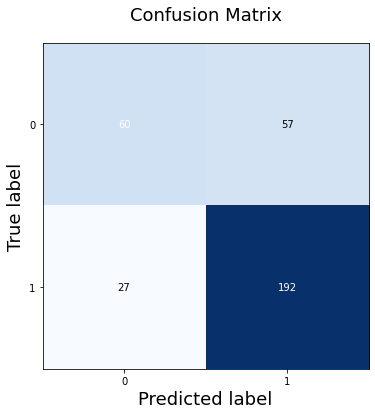

precision score:  0.7710843373493976
recall score:  0.8767123287671232
f2:  0.8533333333333333
f0.5:  0.7901234567901235
classification report: 
               precision    recall  f1-score   support

           0       0.69      0.51      0.59       117
           1       0.77      0.88      0.82       219

    accuracy                           0.75       336
   macro avg       0.73      0.69      0.70       336
weighted avg       0.74      0.75      0.74       336

AUC:  0.694766420793818


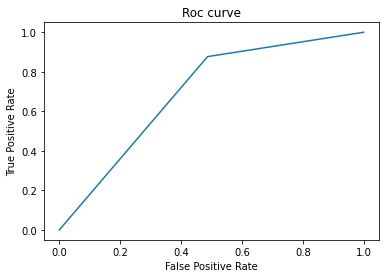

In [ ]:

testing_images, testing_labels= load_testing()
testing_labels = label_traduction(testing_labels,0)

first_testing_images = enhance_image(testing_images)
first_testing_images = filter_dataset(first_testing_images)

second_testing_images = enhance_contrast(testing_images)

first_testing_images = np.expand_dims(first_testing_images, -1)
second_testing_images = np.expand_dims(second_testing_images, -1)

first_testing_images = first_testing_images/65536
second_testing_images = second_testing_images/65536

model_1,model_2,model_3 = load_models()

average_prediction = []
majority_prediction = []

prediction_1 = model_1.predict(first_testing_images)
prediction_2 = model_2.predict(second_testing_images)
prediction_3 = model_3.predict(second_testing_images)

for i in range(len(prediction_1)):
  average_prediction.append(average_voting(prediction_1[i],prediction_2[i],prediction_3[i]))
  majority_prediction.append(majority_voting(prediction_1[i],prediction_2[i],prediction_3[i]))

print("---------------------------------------------------------")
print("Average voting performances")
print("Test loss", precision_score(testing_labels,average_prediction))
print("Test accuracy",recall_score(testing_labels,average_prediction))
in_depth_performance(testing_labels,average_prediction)

print("---------------------------------------------------------")
print("Majority voting performances")
print("Test loss", precision_score(testing_labels,majority_prediction))
print("Test accuracy",recall_score(testing_labels,majority_prediction))
in_depth_performance(testing_labels,majority_prediction)
